In [1]:
import networkx as nx
%matplotlib inline

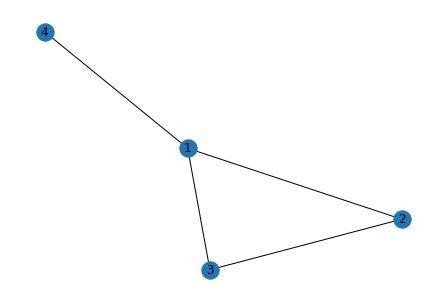

In [2]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

In [3]:
nx.has_path(G, 3, 4)

True

In [4]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

In [5]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

In [6]:
nx.shortest_path_length(G, 3, 4)

2

In [7]:
nx.is_connected(G)

True

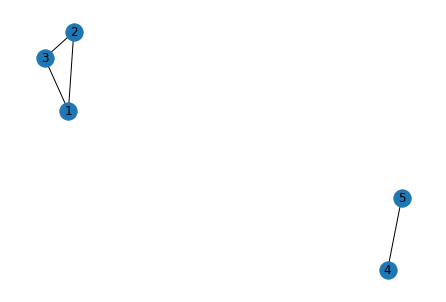

In [9]:
G = nx.Graph()

nx.add_cycle(G,(1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [10]:
nx.is_connected(G)

False

In [11]:
nx.has_path(G, 3, 5)

False

In [12]:
nx.number_connected_components(G)

2

In [13]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In [14]:
components = list(nx.connected_components(G))
len(components[0])

3

In [15]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

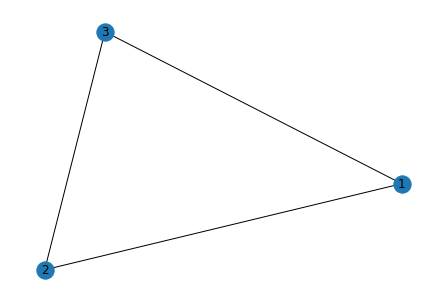

In [16]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

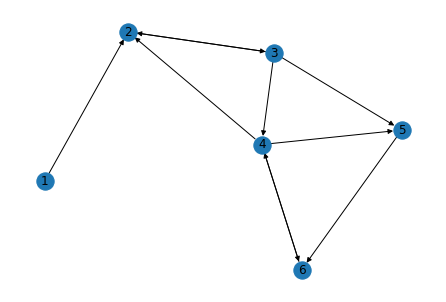

In [17]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

In [18]:
nx.has_path(D, 1, 4)

True

In [19]:
nx.has_path(D, 4, 1)

False

In [20]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [21]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

In [23]:
nx.is_strongly_connected(D)

False

In [24]:
nx.is_weakly_connected(D)

True

In [25]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [26]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

In [27]:
G = nx.read_graphml('DataSets/openflights_usa.graphml.gz')

In [28]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

In [29]:
G.nodes['IND']['name']

'Indianapolis International Airport'

## EXERCISE 1


#### Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

In [31]:
def DirectFlight(port1,port2,G):
    if len(nx.shortest_path(G, port1, port2))==2:
        print('There is direct flight between'+port1+' and '+port2)
    else:
        print('There is no direct flight between'+port1+' and '+port2)
    
    

In [32]:
port1='IND'
port2='FAI'
DirectFlight(port1,port2,G)

There is no direct flight betweenIND and FAI


## EXERCISE 2

#### If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

In [33]:
def FewestNumOfFligts(port1,port2,G):
    print('The shortest flight passes through these cities:  ')
    cities=nx.shortest_path(G, port1, port2)
    for city in cities:
        print(city)
    

In [34]:
port1='IND'
port2='FAI'
FewestNumOfFligts(port1,port2,G)

The shortest flight passes through these cities:  
IND
BOS
SEA
FAI


## EXERCISE 3 

#### Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [36]:
def IsThereConnectingFlights(G):
    if nx.is_connected(G):
        print('Yes, it is possible')
    else:
        print('No, it is not possible')

In [37]:
IsThereConnectingFlights(G)

No, it is not possible
